* Spin-up determination

In [33]:
from __future__ import division

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import (
    nc_tools,
    viz_tools,
    stormtools,
    tidetools,
)
import datetime, os
from salishsea_tools import nc_tools
import matplotlib.gridspec as gridspec
import wind
import tides
from importlib import reload
%matplotlib inline

In [2]:
restartU = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/15days_nowcast_restart14/1hnowcastrestart06150629gridU.nc')
restartConU = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/continue15daysrestart/1hnowcastrestart06300714gridU.nc')
restartV = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/15days_nowcast_restart14/1hnowcastrestart06150629gridV.nc')
restartConV = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/continue15daysrestart/1hnowcastrestart06300714gridV.nc')
coldU = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/15days_nowcast_coldstart14/1hnowcastallthesame06150629gridU.nc')
coldConU = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/continue15dayscoldstart/1hnowcastallthesame06300714gridU.nc')
coldV = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/15days_nowcast_coldstart14/1hnowcastallthesame06150629gridV.nc')
coldConV = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/continue15dayscoldstart/1hnowcastallthesame06300714gridV.nc')

In [3]:
rms = np.zeros(720); abse = np.zeros_like(rms); mvel = np.zeros_like(rms); maxerr = np.zeros_like(rms)
for i in range(720):
    if i< 360:
        rU = restartU.variables['vozocrtx'][i]
        cU = coldU.variables['vozocrtx'][i]
        rV = restartV.variables['vomecrty'][i]
        cV = coldV.variables['vomecrty'][i]
        difference = np.mean((rU-cU)**2 + (rV-cV)**2)
        maxerr[i] = np.max((rU-cU)**2 + (rV-cV)**2)
        ref = np.mean(rU**2 + rV**2 + cU**2 + cV**2)
        rms[i] = np.sqrt(difference/ref)
        abse[i] =np.sqrt(difference)
        mvel[i] = np.sqrt(ref)
    else:
        rU = restartConU.variables['vozocrtx'][i-360]
        cU = coldConU.variables['vozocrtx'][i-360]
        rV = restartConV.variables['vomecrty'][i-360]
        cV = coldConV.variables['vomecrty'][i-360]
        difference = np.mean((rU-cU)**2 + (rV-cV)**2)
        maxerr[i] = np.max((rU-cU)**2 + (rV-cV)**2)
        ref = np.mean(rU**2 + rV**2 + cU**2 + cV**2)
        rms[i] = np.sqrt(difference/ref)
        abse[i] =np.sqrt(difference)
        mvel[i] = np.sqrt(ref)

In [4]:
## load wind
OP = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m06d01.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]

import glob
files = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m0[6-7]d*.nc')
sstr = 'ops_y2015m0{}d{}.nc'.format(6, 15)
estr = 'ops_y2015m0{}d{}.nc'.format(7, 14)
filesOP = []
for filename in files:
    if os.path.basename(filename) >= sstr:
        if os.path.basename(filename) <= estr:
            filesOP.append(filename)
filesOP.sort(key=os.path.basename)

start = '15-Jun-2015'; end = '14-Jul-2015';
start2 = '14-Jul-2015'; end2 = '14-Jul-2015';
endd = '14-Jul-2015';

stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

In [37]:
## load t_tide
tfile = '/ocean/jieliu/research/meopar/tools/SalishSeaNowcast/nowcast/\
tidal_predictions/Point Atkinson_t_tide_compare8_31-Dec-2013_02-Dec-2015.csv'
ttide, msl = stormtools.load_tidal_predictions(tfile)

run_label1 = datetime.datetime(2015,6,29,5,0,0)
run_label2 = datetime.datetime(2015,7,7,17,0,0)

low_ind,up_ind,lab_ind1,lab_ind2 = tides.find_ind_tide(ttide,sax,eax,run_label1,run_label2)

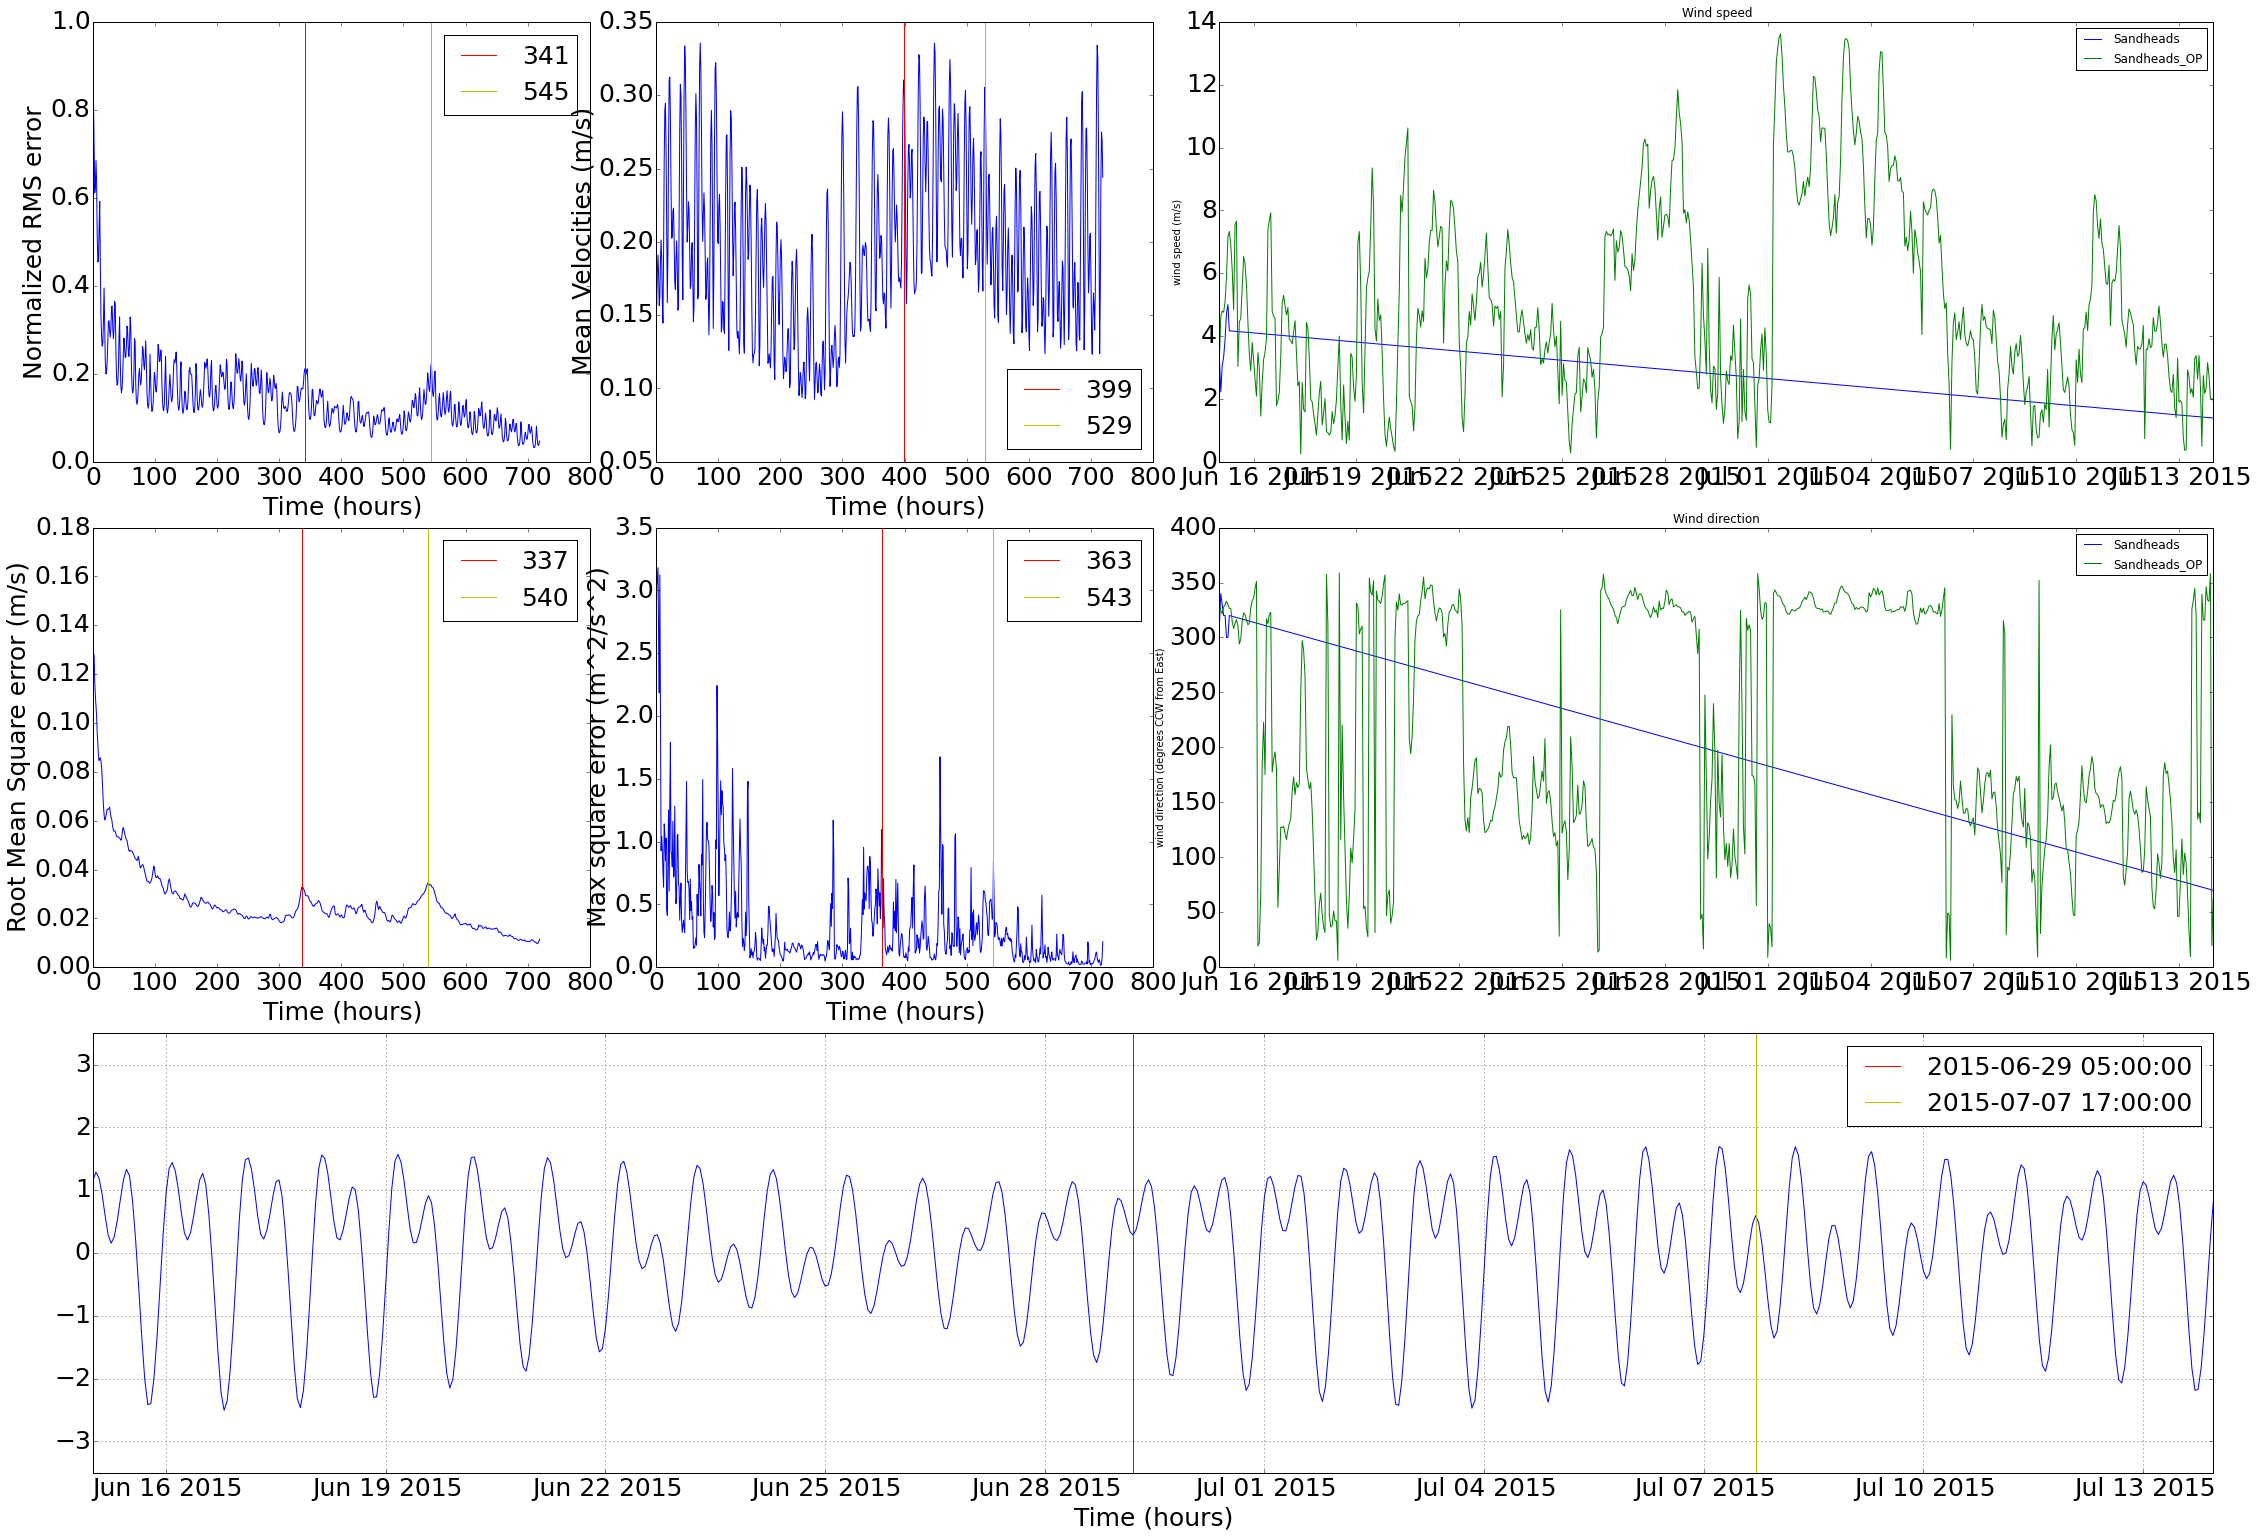

In [45]:
fig = plt.figure(figsize=(38,26))
gs = gridspec.GridSpec(3, 3,width_ratios=[1,1,2], height_ratios=[1, 1,1])  
gs.update(hspace=0.15, wspace=0.1)
ax0 = fig.add_subplot(gs[0,0]);ax1 = fig.add_subplot(gs[0,1])#for error
ax2 = fig.add_subplot(gs[1,0]);ax3 = fig.add_subplot(gs[1,1])#for error
ax0.plot(rms);ax0.set_ylabel('Normalized RMS error',fontsize = 25)
ax0.plot([300+np.nanargmax(rms[300:400]),300+np.nanargmax(rms[300:400])],[0,1],'r-',label=300+np.nanargmax(rms[300:400]))
ax0.plot([500+np.nanargmax(rms[500:600]),500+np.nanargmax(rms[500:600])],[0,1],'y-',label=500+np.nanargmax(rms[500:600]))
ax1.plot(mvel); ax1.set_ylabel('Mean Velocities (m/s)',fontsize = 25)
ax1.plot([300+np.nanargmax(mvel[300:400]),300+np.nanargmax(mvel[300:400])],[0.05,0.35],'r-',label=300+np.nanargmax(mvel[300:400]))
ax1.plot([500+np.nanargmax(mvel[500:600]),500+np.nanargmax(mvel[500:600])],[0.05,0.35],'y-',label=500+np.nanargmax(mvel[500:600]))
ax2.plot(abse); ax2.set_ylabel('Root Mean Square error (m/s)',fontsize = 25)
ax2.plot([300+np.nanargmax(abse[300:400]),300+np.nanargmax(abse[300:400])],[0,0.18],'r-',label=300+np.nanargmax(abse[300:400]))
ax2.plot([500+np.nanargmax(abse[500:600]),500+np.nanargmax(abse[500:600])],[0,0.18],'y-',label=500+np.nanargmax(abse[500:600]))
ax3.plot(maxerr); ax3.set_ylabel('Max square error (m^2/s^2)',fontsize = 25)
ax3.plot([300+np.nanargmax(maxerr[300:400]),300+np.nanargmax(maxerr[300:400])],[0,3.5],'r-',label=300+np.nanargmax(maxerr[300:400]))
ax3.plot([500+np.nanargmax(maxerr[500:600]),500+np.nanargmax(maxerr[500:600])],[0,3.5],'y-',label=500+np.nanargmax(maxerr[500:600]))
ax4 = fig.add_subplot(gs[0,2]);ax5 = fig.add_subplot(gs[1,2])#wind
ax6 = fig.add_subplot(gs[2,:])#tide
ax4,ax5 =wind.compare_winds_gs(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0,ax4,ax5)
ax6.plot(ttide.time[low_ind:up_ind], ttide.pred_all[low_ind:up_ind])
ax6.plot([ttide.time[lab_ind1],ttide.time[lab_ind1]],[-3.5,3.5],'r-',label = run_label1)
ax6.plot([ttide.time[lab_ind2],ttide.time[lab_ind2]],[-3.5,3.5],'y-',label = run_label2)
ax6.grid('on')
ax6.set_ylim(-3.5,3.5)
for ax in [ax0,ax1,ax2,ax3,ax6]:
    ax.set_xlabel('Time (hours)',fontsize = 25)
    ax.legend(loc = 'best',fontsize = 25)
for ax in [ax0,ax1,ax2,ax3,ax4,ax5,ax6]:
    plt.setp(ax.get_xticklabels(), fontsize=25)
    plt.setp(ax.get_yticklabels(), fontsize=25)

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


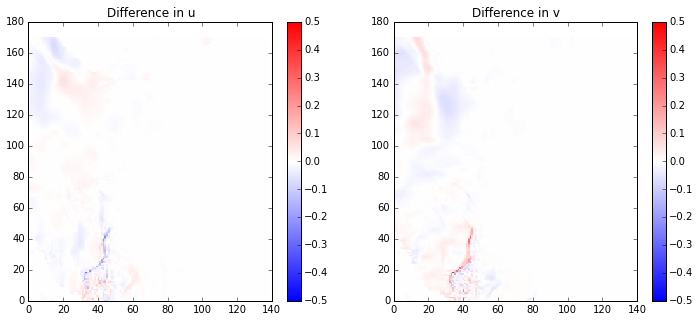

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
mesh = ax[0].pcolormesh(rU[0]-cU[0], cmap='bwr', vmax=0.5, vmin=-0.5)
ax[0].set_title('Difference in u')
fig.colorbar(mesh, ax=ax[0])
ax[1].set_title('Difference in v')
mesh = ax[1].pcolormesh(rV[0]-cV[0], cmap='bwr', vmax=0.5, vmin=-0.5)
fig.colorbar(mesh, ax=ax[1])

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


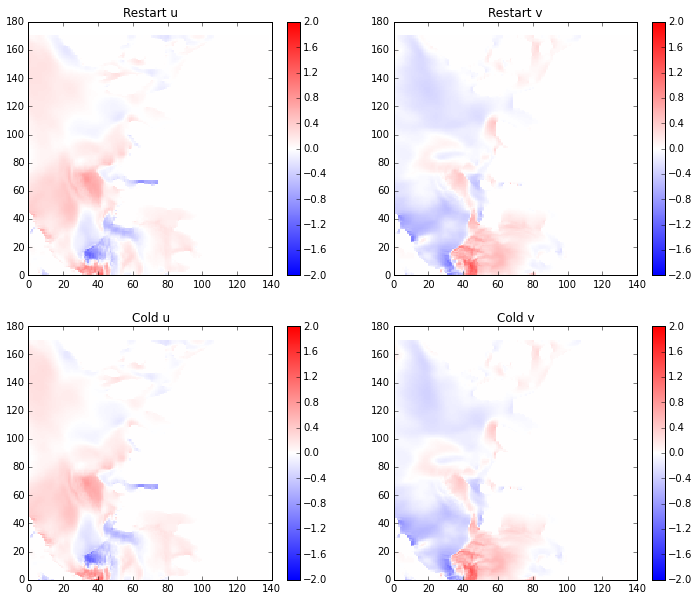

In [5]:
fig, ax = plt.subplots(2,2,figsize=(12,10))
mesh = ax[0,0].pcolormesh(rU[0], cmap='bwr', vmax=2, vmin=-2)
fig.colorbar(mesh, ax=ax[0,0])
mesh = ax[0,1].pcolormesh(rV[0], cmap='bwr', vmax=2, vmin=-2)
fig.colorbar(mesh, ax=ax[0,1])
mesh = ax[1,0].pcolormesh(cU[0], cmap='bwr', vmax=2, vmin=-2)
fig.colorbar(mesh, ax=ax[1,0])
mesh = ax[1,1].pcolormesh(cV[0], cmap='bwr', vmax=2, vmin=-2)
fig.colorbar(mesh, ax=ax[1,1])
ax[0,0].set_title('Restart u')
ax[0,1].set_title('Restart v')
ax[1,0].set_title('Cold u')
ax[1,1].set_title('Cold v')